Extinction Profile
=====================

Extinction profiles is a recently proposed technique used for the classification of remote sensing data. The main publication describing the method is the following:

**P Ghamisi, R Souza, JA Benediktsson, XX Zhu, L Rittner, RA Lotufo. " Extinction profiles for the classification of remote sensing data," IEEE Transactions on Geoscience and Remote Sensing 54 (10), 5631-5645.**

In this demo, we illustrate the computation of an area extinction profile of a satellite image.

Loading the image and defining profile connectivity
----------------------------------------------------------

Lines 1 htrough 13 import the necessary libraries to run this demo. Line 17 load the satellite image. Lines 26 through 29 define the structuring element with connectivity-4. Line 32 defines the parameters to be used to compute the extinction profile. Line 39 declares the array to store the extinction profile.

Image dimensions: 550x690 pixels
Nb. of extrema used to compute the profile:
[64, 32, 16, 8, 4, 2, 1]


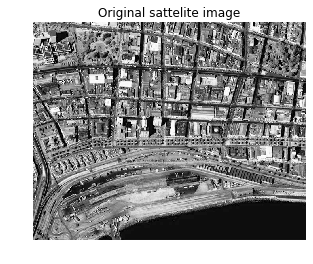

In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

# Loading the image.
# Make sure the image you read is either uint8 or uint16
data = np.asarray(Image.open("./Sample-images/sattelite.jpg").convert("L"))
print("Image dimensions: %dx%d pixels" %data.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(data, cmap='Greys_r')
plt.axis('off')
plt.title("Original sattelite image")

#Structuring element. connectivity-4
Bc = np.zeros((3,3),dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Parameters used to compute the extinction profile
nextrema =  [int(2**jj) for jj in range(7)][::-1]
print("Nb. of extrema used to compute the profile:")
print(nextrema)

# Array to store the profile
H,W = data.shape
Z = 2*len(nextrema)+1
ep = np.zeros((H,W,Z))

Min-tree Profile
------------------

Initially, we compute the profile for the min-tree (max-tre of the negated image). Lines 1 through 3 negate the image. Line 6 builds the min-tree. Line 9 extracts the area attribute from the node array structure and line 10 computes the area extinction values.

The loop in lines 14 through 18 compute the extinction filter for the different parameters of the profile and assign the results to the variable *ep*.

In [2]:
#Negating the image
max_value = data.max()
data_neg = (max_value - data)

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(data_neg,Bc)

# Area attribute extraction and computation of area extinction values
area = mxt.node_array[3,:]
Aext = mxt.computeExtinctionValues(area,"area")
    
# Min-tree profile
i = len(nextrema) - 1
for n in nextrema:
    mxt2 = mxt.clone()
    mxt2.extinctionFilter(Aext,n)
    ep[:,:,i] = max_value - mxt2.getImage()
    i-=1

# Putting the original image in the profile    
i = len(nextrema)
ep[:,:,i] = data
i +=1


Max-tree Profile
------------------

Then, we compute the profile for the max-tree. Lines 1 through 3 negate the image. Line 2 builds the min-tree. Line 5 extracts the area attribute from the node array structure and line 6 computes the area extinction values.

The loop in lines 9 through 13 computes the extinction filter for the different parameters of the profile and assign the results to the variable *ep*.

In [3]:
#Building the max-tree
mxt = siamxt.MaxTreeAlpha(data,Bc)

# Area attribute extraction and computation of area extinction values
area = mxt.node_array[3,:]
Aext = mxt.computeExtinctionValues(area,"area")
    
# Max-tree profile
for n in nextrema:
    mxt2 = mxt.clone()
    mxt2.extinctionFilter(Aext,n)
    ep[:,:,i] = mxt2.getImage()
    i+=1



Displaying the profile mosaic
--------------------------------

Finally, the code below puts the images in the profile side by side and dispaly it. SInce, this code is not related to max-tree, we will ommit its explanation.

Text(0.5, 1.0, 'Extinction Profile Mosaic')

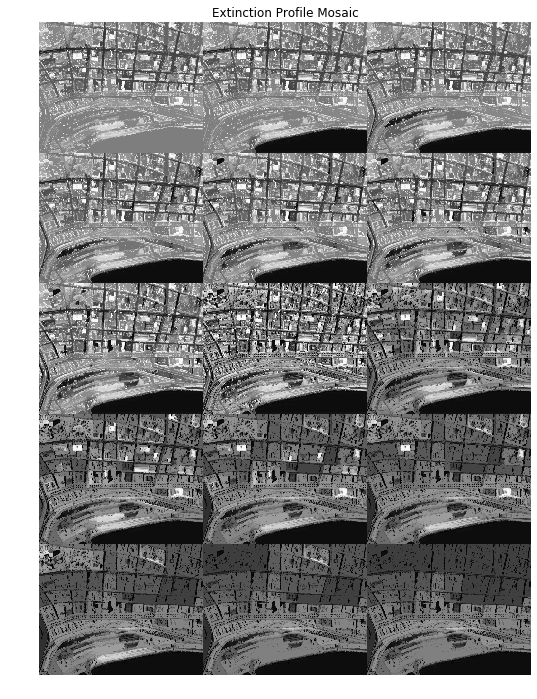

In [4]:
# Number of cloumns in the mosaic
N = 3

# Computing the dimensions of the mosiac image
H2 = Z//N
if (Z%N != 0):
    H2+=1
H2 = H2*H    
W2 = N*W

# Mosaic image initialization
mosaic = np.zeros((H2,W2), dtype = ep.dtype)

i,j = 0,0
for ii in range(Z):
    mosaic[i*H:(i+1)*H,j*W:(j+1)*W] = ep[:,:,ii]
    j+=1
    if (j%N == 0):
        j = 0
        i+=1
plt.rcParams['figure.figsize'] = 16, 12             
#Displaying the profile mosaic
fig = plt.figure()
plt.imshow(mosaic, cmap='Greys_r')
plt.axis('off')
plt.title("Extinction Profile Mosaic")